# Statystyka w analizie danych


## Laboratorium 1


### Opis

Celem laboratorium jest instalacja środowiska programistycznego oraz zapoznanie się z podstawowymi bibliotekami do przetwarzania danych w języku Python.

### Termin
Zadanie należy wykonać w trakcie trwania laboratorium lub przed kolejnym terminem.

<u>Uwaga:</u>

Zadanie indywidualne. Każdy student powinien pobrać treść zadania i wykonać je samodzielnie.
Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca, a materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dane.npz
        +-- 📜 dane-ludnosc.npz
```



### Instalacja środowiska

Wymagania:
- Python>=3.8
- notebook
- numpy
- pandas
- matplotlib
- scikit-learn
- scipy

Sprawdź wersję Pythona jaką masz zainstalowaną w systemie:
`python -V`

#### Instalacja (dwa warianty):

#### Dla zainstalowanej instancji Pythona

`pip install notebook numpy pandas matplotlib scikit-learn scipy`

#### Dla środowiska Conda

`conda create -n smpd python=3.8 notebook numpy pandas matplotlib scikit-learn scipy`


### Zadania

#### Zadanie 1

Wczytaj dane z pliku `dane.npz`. Plik ten zawiera zbiór danych zawierający **WYDATKI BUDŻETÓW WOJEWÓDZTW**.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
import np
with open('./dataset/dane.npz', 'rb') as f:
    content = np.load(f)
    columns, data = content['columns'].tolist(), content['data'].tolist()
```

In [4]:
import numpy as np
import pandas as pd
content = np.load('./dataset/dane.npz')
columns, data = content['columns'], content['data']
spendings = pd.DataFrame(data, columns=columns).astype({'Kod': 'int32', 'Rok': 'int32', 'Wartosc': 'float'})

#### Zadanie 2

Zapoznaj się z zawartością zmiennych `columns` oraz `data`.


In [5]:
spendings

,Kod,Nazwa,Rodzaje wydatków,Rok,Wartosc,Jednostka miary
0,0,POLSKA,ogółem,1999,3.264607e+09,zł
1,0,POLSKA,ogółem,2000,3.787133e+09,zł
2,0,POLSKA,ogółem,2001,4.737055e+09,zł
3,0,POLSKA,ogółem,2002,4.340436e+09,zł
4,0,POLSKA,ogółem,2003,4.712741e+09,zł
...,...,...,...,...,...,...
369,3200000,ZACHODNIOPOMORSKIE,ogółem,2016,5.767500e+08,zł
370,3200000,ZACHODNIOPOMORSKIE,ogółem,2017,8.059518e+08,zł
371,3200000,ZACHODNIOPOMORSKIE,ogółem,2018,9.520689e+08,zł
372,3200000,ZACHODNIOPOMORSKIE,ogółem,2019,7.870874e+08,zł


#### Zadanie 3

Wyświetl tylko dane z roku `2008`.


In [6]:
spendings_2008 = spendings[spendings['Rok'] == 2008]
spendings_2008

,Kod,Nazwa,Rodzaje wydatków,Rok,Wartosc,Jednostka miary
9,0,POLSKA,ogółem,2008,1.300273e+10,zł
31,200000,DOLNOŚLĄSKIE,ogółem,2008,1.006184e+09,zł
53,400000,KUJAWSKO-POMORSKIE,ogółem,2008,6.407158e+08,zł
75,600000,LUBELSKIE,ogółem,2008,6.986053e+08,zł
97,800000,LUBUSKIE,ogółem,2008,3.400599e+08,zł
119,1000000,ŁÓDZKIE,ogółem,2008,6.642599e+08,zł
141,1200000,MAŁOPOLSKIE,ogółem,2008,9.233394e+08,zł
163,1400000,MAZOWIECKIE,ogółem,2008,3.079250e+09,zł
185,1600000,OPOLSKIE,ogółem,2008,3.719207e+08,zł
207,1800000,PODKARPACKIE,ogółem,2008,6.460187e+08,zł


#### Zadanie 4

Wyświetl wykres uwzględniając 10 województw (bez sumarycznego dla całego kraju), w których wydatki budżetów były największe.

> Podpowiedź: Możesz w tym celu wykorzystać moduł matplotlib.pyplot. Przykład:
```python
import matplotlib.pyplot as plt
plt.bar([1, 2, 3], [5, 2, 4])
```

> Podpowiedź 2: Sprawdź inne funkcje aby utworzyć tytuł wykresu, oznaczyć osie, wyświetlić legendę i zmienić kolory słupków. https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [7]:
spendings_2008_no_poland = spendings_2008[spendings_2008['Nazwa'] != 'POLSKA']
spendings_top_10 = spendings_2008_no_poland.sort_values(by='Wartosc', ascending=False).iloc[:10]
spendings_top_10

,Kod,Nazwa,Rodzaje wydatków,Rok,Wartosc,Jednostka miary
163,1400000,MAZOWIECKIE,ogółem,2008,3.079250e+09,zł
273,2400000,ŚLĄSKIE,ogółem,2008,1.263238e+09,zł
31,200000,DOLNOŚLĄSKIE,ogółem,2008,1.006184e+09,zł
339,3000000,WIELKOPOLSKIE,ogółem,2008,9.627391e+08,zł
141,1200000,MAŁOPOLSKIE,ogółem,2008,9.233394e+08,zł
251,2200000,POMORSKIE,ogółem,2008,7.122352e+08,zł
75,600000,LUBELSKIE,ogółem,2008,6.986053e+08,zł
119,1000000,ŁÓDZKIE,ogółem,2008,6.642599e+08,zł
207,1800000,PODKARPACKIE,ogółem,2008,6.460187e+08,zł
53,400000,KUJAWSKO-POMORSKIE,ogółem,2008,6.407158e+08,zł


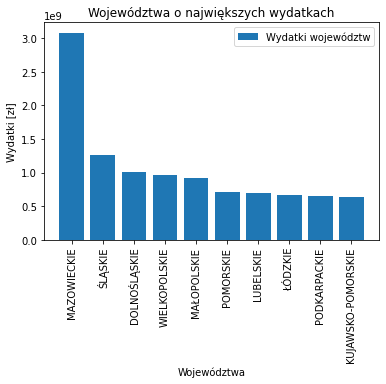

In [8]:
import matplotlib.pyplot as plt
plt.bar(spendings_top_10['Nazwa'], spendings_top_10['Wartosc'], label='Wydatki województw')
_ = plt.xticks(rotation=90)
plt.title('Województwa o największych wydatkach')
plt.xlabel('Województwa')
plt.ylabel('Wydatki [zł]')
_ = plt.legend()

#### Zadanie 5

Wczytaj dane z pliku `dane-ludnosc.npz`. Plik ten zawiera zbiór danych zawierający **liczbę ludnosci**.

Oblicz wydatki z budżetu na mieszkańca dla każdego z województw (_uwzględnij dane dla roku `2008`_).


In [9]:
# Load people data
with open('./dataset/dane-ludnosc.npz', 'rb') as f:
    content = np.load(f)
    columns, data = content['columns'].tolist(), content['data'].tolist()
    people = pd.DataFrame(data, columns=columns).astype({'Kod': 'int32', 'Rok': 'int32', 'Wartosc': 'float'})

In [10]:
# Preview of people table
people

,Kod,Nazwa,Wiek,Płeć,Rok,Wartosc,Jednostka miary
0,0,POLSKA,ogółem,ogółem,1999,38263303.0,osoba
1,0,POLSKA,ogółem,ogółem,2000,38253955.0,osoba
2,0,POLSKA,ogółem,ogółem,2001,38242197.0,osoba
3,0,POLSKA,ogółem,ogółem,2002,38218531.0,osoba
4,0,POLSKA,ogółem,ogółem,2003,38190608.0,osoba
...,...,...,...,...,...,...,...
369,3200000,ZACHODNIOPOMORSKIE,ogółem,ogółem,2016,1708174.0,osoba
370,3200000,ZACHODNIOPOMORSKIE,ogółem,ogółem,2017,1705533.0,osoba
371,3200000,ZACHODNIOPOMORSKIE,ogółem,ogółem,2018,1701030.0,osoba
372,3200000,ZACHODNIOPOMORSKIE,ogółem,ogółem,2019,1696193.0,osoba


In [11]:
# Join tables in sql style
people_2008 = people[people['Rok'] == 2008]
people_and_spendings = pd.merge(left=spendings_2008_no_poland, 
                                right=people_2008, 
                                how='left', 
                                on='Nazwa', 
                                suffixes=(' wydatki', ' ludność')
                               )

In [12]:
# Add calculated column
people_and_spendings['Wydatek na osobę'] = people_and_spendings['Wartosc wydatki'] / people_and_spendings['Wartosc ludność']

In [13]:
# Show result
people_and_spendings[['Nazwa', 'Wydatek na osobę']].sort_values('Wydatek na osobę')


,Nazwa,Wydatek na osobę
4,ŁÓDZKIE,260.610491
11,ŚLĄSKIE,271.917624
9,PODLASKIE,280.757537
5,MAŁOPOLSKIE,280.894804
14,WIELKOPOLSKIE,283.357167
12,ŚWIĘTOKRZYSKIE,293.902718
8,PODKARPACKIE,307.701965
1,KUJAWSKO-POMORSKIE,309.836195
13,WARMIŃSKO-MAZURSKIE,315.004856
15,ZACHODNIOPOMORSKIE,316.630934


#### Zadanie 6

Wykonaj dalszą analizę zbiorów danych (dowolną). Czy coś ciekawego zaobserwowałeś?


# Średni wydatek na mieszkańca na przestrzeni lat

In [14]:
total_spendings_by_year = spendings[spendings['Nazwa'] == 'POLSKA'][['Rok', 'Wartosc']].set_index('Rok')['Wartosc']
total_people_by_year = people[people['Nazwa'] == 'POLSKA'][['Rok', 'Wartosc']].set_index('Rok')['Wartosc']
avg_year_spending_per_person = total_spendings_by_year / total_people_by_year

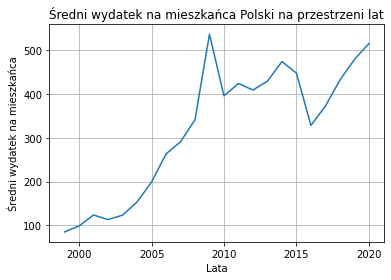

In [15]:
plt.plot(avg_year_spending_per_person.index, avg_year_spending_per_person)
plt.title('Średni wydatek na mieszkańca Polski na przestrzeni lat')
plt.grid()
plt.xlabel('Lata')
_ = plt.ylabel('Średni wydatek na mieszkańca')

## Wnioski
Średni wydatek na mieszkańca Polski można określić współczynnikiem zbliżonym do PKB. W latach 2000-2008 następowała poprawa gospodarcza, ponieważ współczynnik ten rósł. Od 2008 do 2017 pojawiły się wachania, które można nazwać pewnego rodzaju kryzysem, lecz od tego czasu stabilnie rośnie.

# Liczba ludności Polski na przestrzeni lat

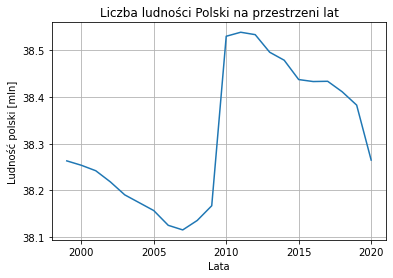

In [18]:
plt.ticklabel_format(style='plain')
plt.plot(total_people_by_year.index, total_people_by_year/1e6)
plt.title('Liczba ludności Polski na przestrzeni lat')
plt.grid()
plt.xlabel('Lata')
_ = plt.ylabel('Ludność polski [mln]')

# Wnioski
W latach 1999-2020 liczba ludności Polski wachała się pomiędzy wartościami 38.1 mln oraz 38.6 mln. Na początku tego okresu wynosiła 38.26 mln i pomimo drastycznego wzrostu w 2009 na koniec wróciła do swojej pierwotnej wartości.
